## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## EDA and Data Preprocessing

In [3]:
# Load the datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')


In [4]:
# Combine datasets for consistent preprocessing
combined_df = pd.concat([train_df.drop('Survived', axis=1), test_df], ignore_index=True)


In [5]:
# Check for missing values
print("Missing values before preprocessing:")
print(combined_df.isnull().sum())

Missing values before preprocessing:
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [6]:
# Impute missing values
# Impute 'Age' with the median age
combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)
# Impute 'Fare' with the median fare
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)
# Impute 'Embarked' with the most frequent value
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_20936\1033106790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_20936\1033106790.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [7]:
# Drop 'Cabin', 'Name', and 'Ticket' as they are not directly useful for modeling
combined_df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [8]:
# Encode categorical variables
# 'Sex' and 'Embarked' can be one-hot encoded
combined_df = pd.get_dummies(combined_df, columns=['Sex', 'Embarked'], drop_first=True)

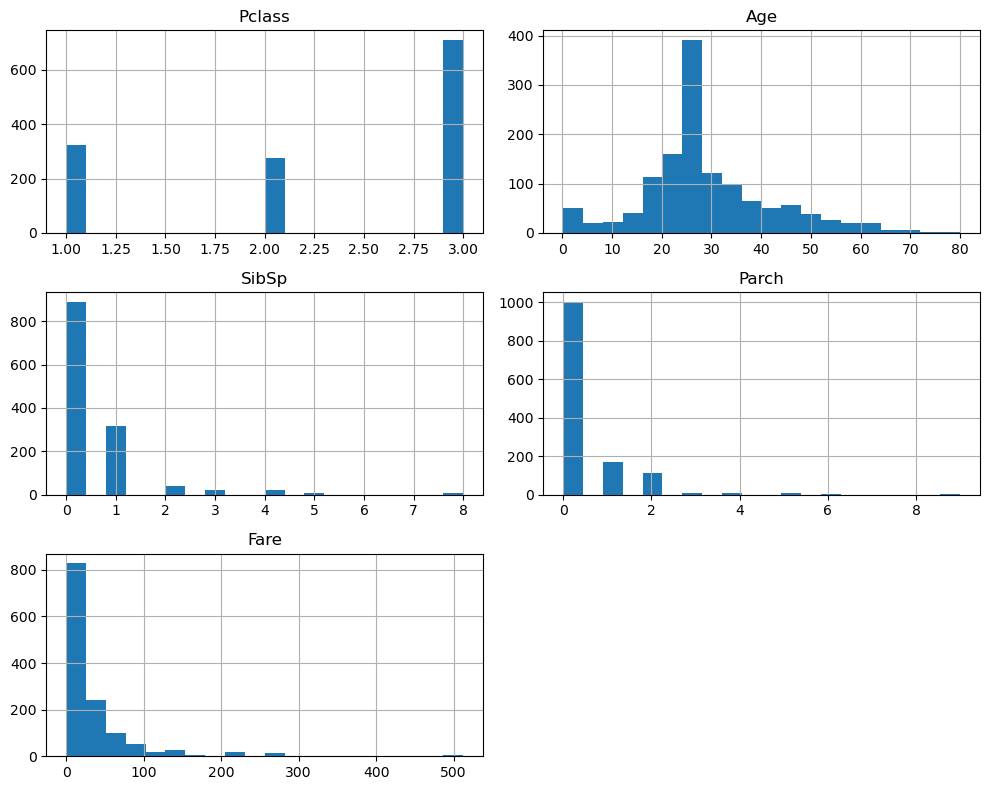

In [30]:
## Check Histrograms for numerical columns
combined_df.hist(figsize=(10,8),bins =20)
plt.suptitle
plt.tight_layout()
plt.show()

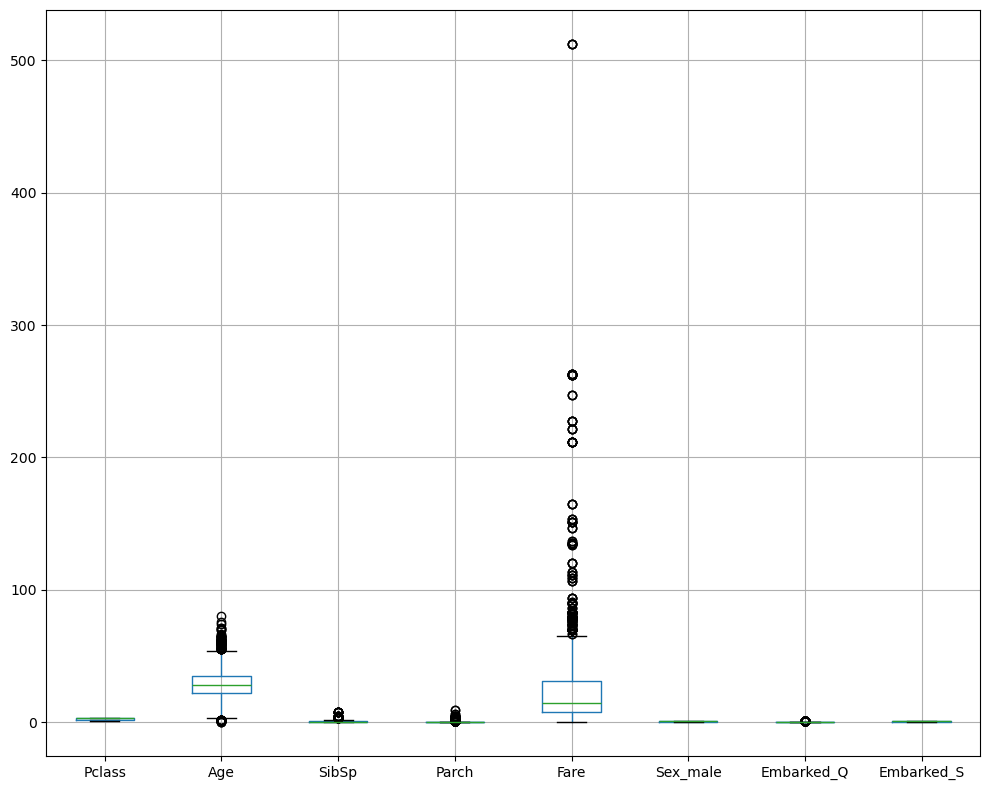

In [31]:
combined_df.boxplot(figsize=(10,8))
plt.tight_layout()
plt.show()

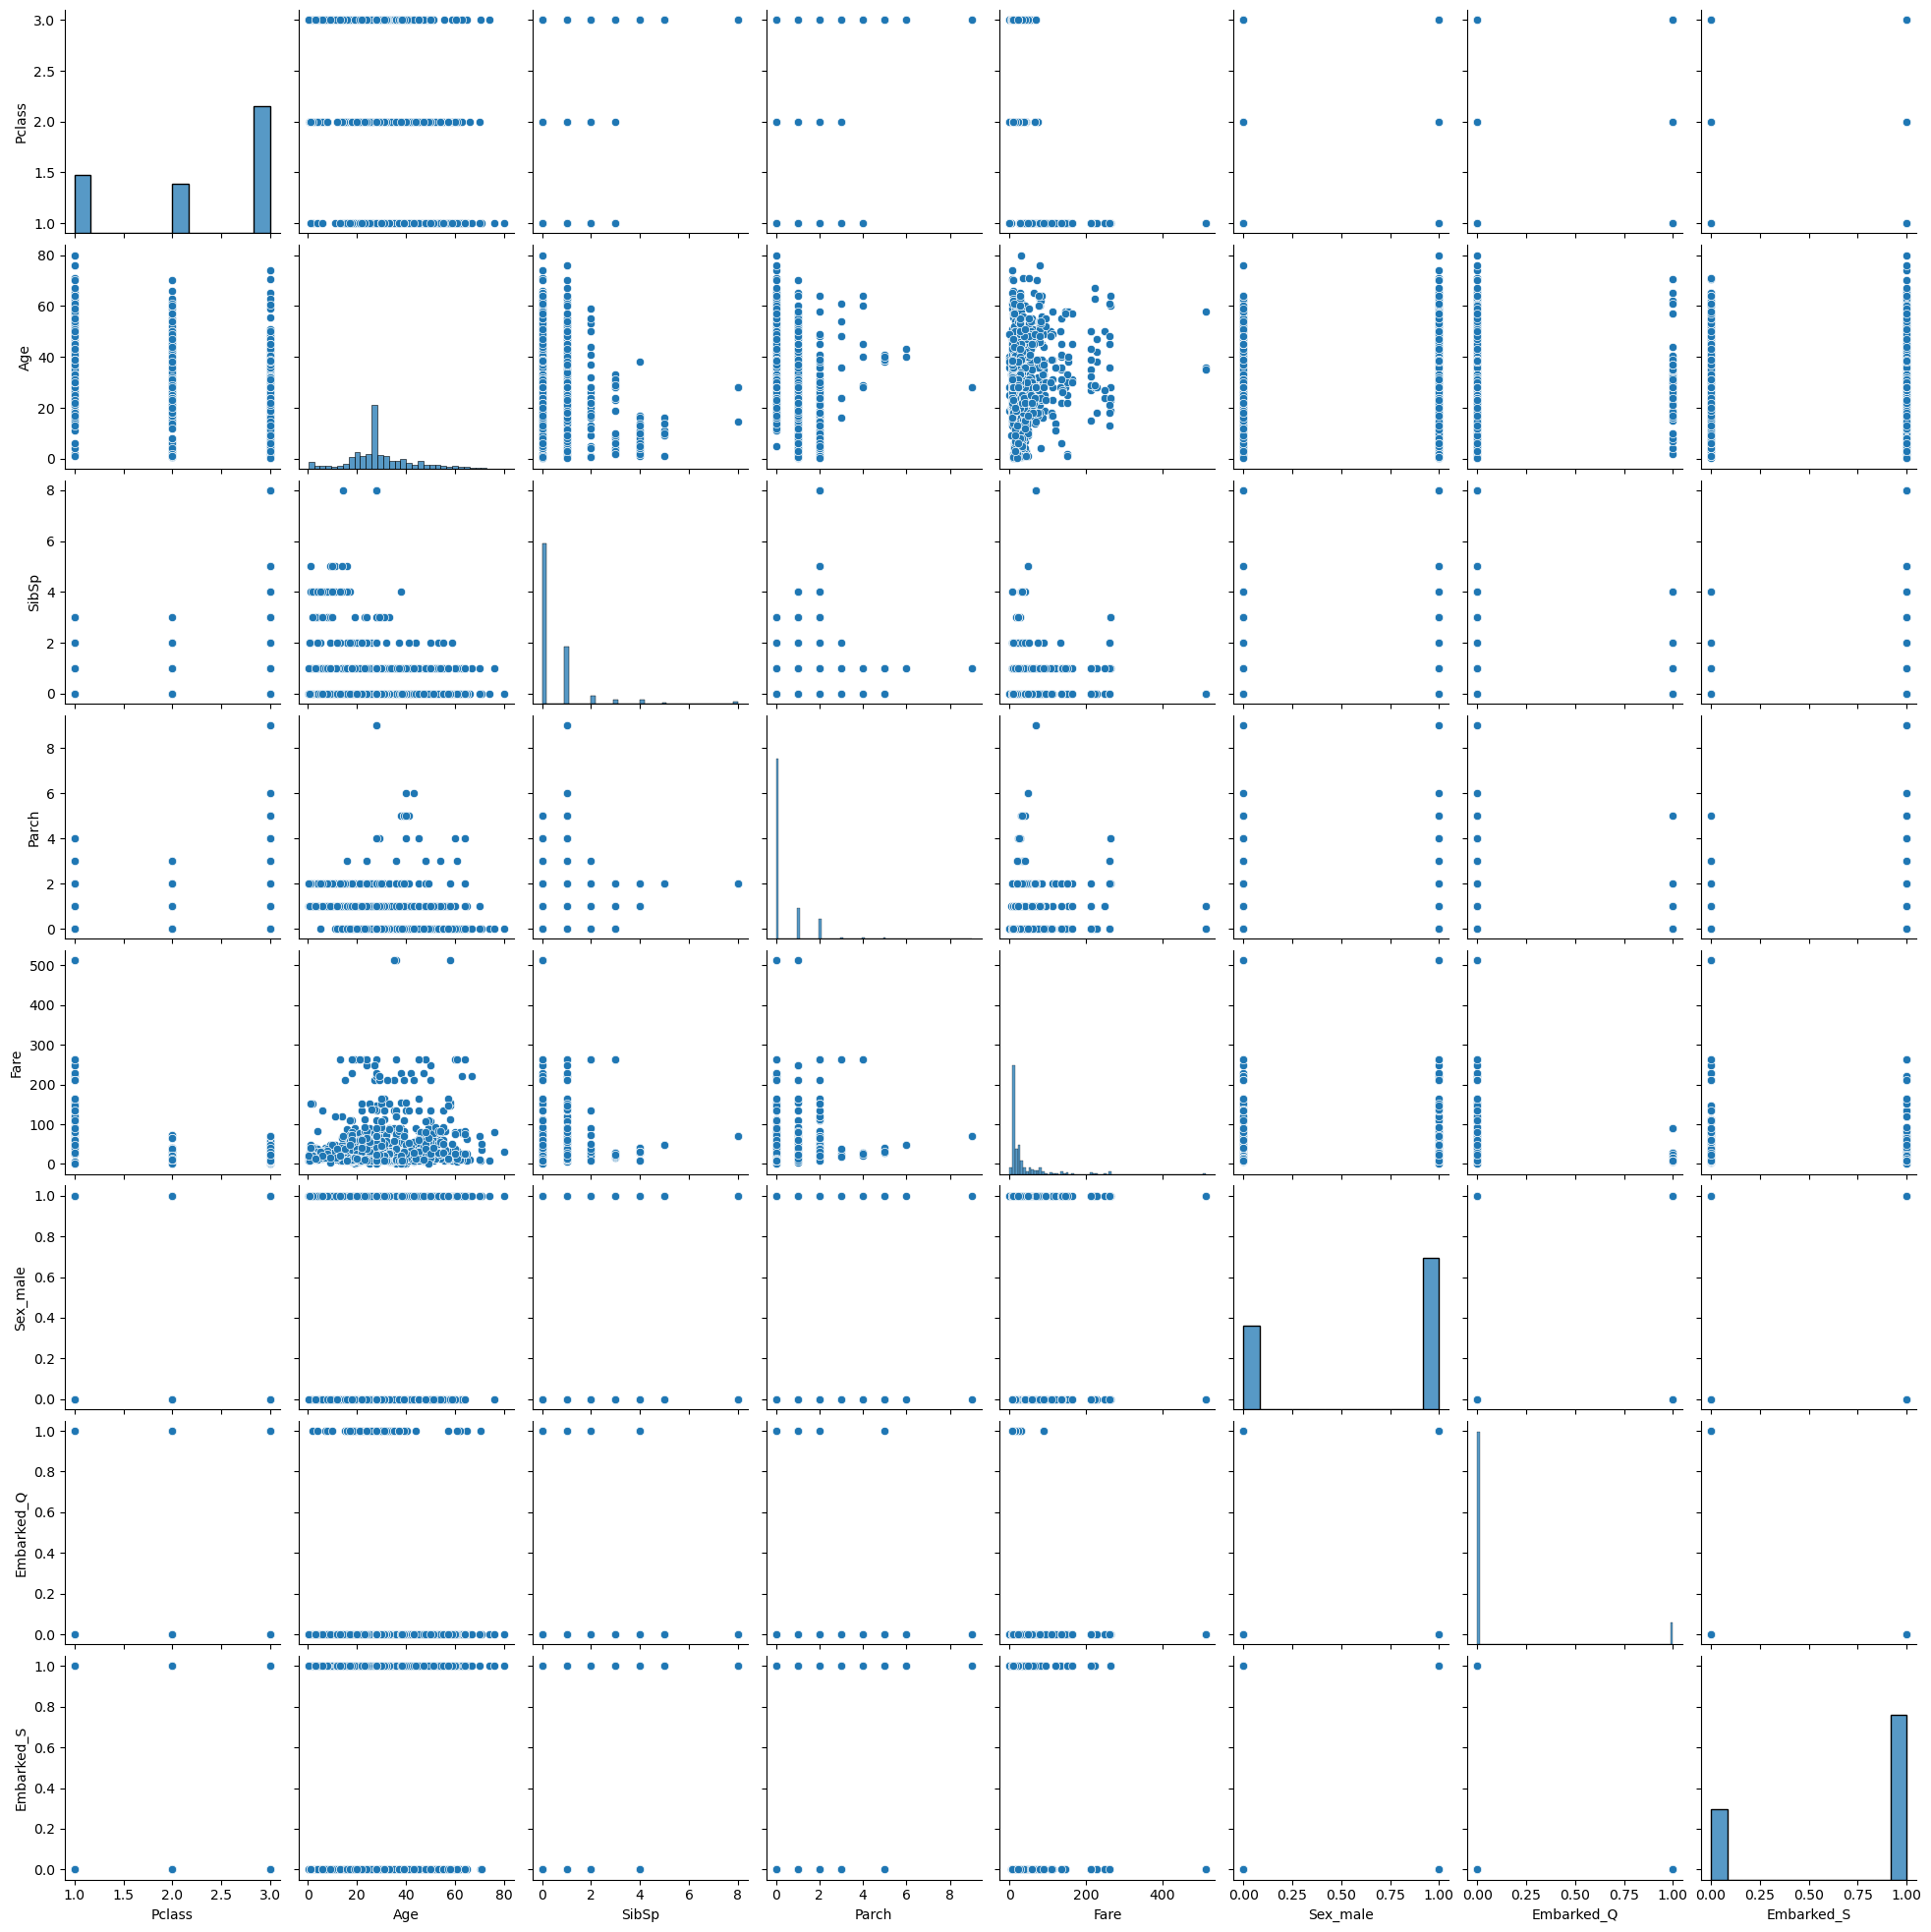

In [33]:
sns.pairplot(combined_df)# relationship between all nemerical columns


In [9]:
# Separate the combined data back into training and testing sets
X_train = combined_df[:len(train_df)]
X_test = combined_df[len(train_df):]
y_train = train_df['Survived']

In [10]:
print("\nMissing values after preprocessing:")
print(X_train.isnull().sum())
print(X_test.isnull().sum())

print("\nData head after preprocessing:")
print(X_train.head())


Missing values after preprocessing:
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Data head after preprocessing:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


## Building Predictive Models

In [12]:
# Split the training data for cross-validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [13]:
# Model 1: LightGBM
print("Training LightGBM model...")
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_split, y_train_split)
lgb_pred = lgb_model.predict(X_val)
print("LightGBM performance on validation set:")
print(f"Accuracy: {accuracy_score(y_val, lgb_pred):.4f}")

Training LightGBM model...
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [14]:
# Model 2: XGBoost
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_split, y_train_split)
xgb_pred = xgb_model.predict(X_val)
print("XGBoost performance on validation set:")
print(f"Accuracy: {accuracy_score(y_val, xgb_pred):.4f}")


Training XGBoost model...
XGBoost performance on validation set:
Accuracy: 0.8045


C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:23:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Hyperparameter Tuning using GridSearchCV


In [16]:
# LightGBM tuning
print("Tuning LightGBM...")
lgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20]
}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_params, cv=3, scoring='accuracy')
lgb_grid.fit(X_train, y_train)
best_lgb = lgb_grid.best_estimator_
print(f"Best LightGBM parameters: {lgb_grid.best_params_}")
print(f"Best LightGBM score: {lgb_grid.best_score_:.4f}")

Tuning LightGBM...
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [17]:
# XGBoost tuning
print("\nTuning XGBoost...")
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False), xgb_params, cv=3, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print(f"Best XGBoost parameters: {xgb_grid.best_params_}")
print(f"Best XGBoost score: {xgb_grid.best_score_:.4f}")


Tuning XGBoost...


C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300}
Best XGBoost score: 0.8429


## Final Comparative Analysis on Test Set


In [19]:
# Make predictions on the preprocessed test set
lgb_final_pred = best_lgb.predict(X_test)
xgb_final_pred = best_xgb.predict(X_test)

In [20]:
# Since we don't have the true labels for the test set, we will compare their performance using cross-validation on the original training data
lgb_cv_scores = cross_val_score(best_lgb, X_train, y_train, cv=5, scoring='accuracy')
xgb_cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores (Accuracy):")
print(f"LightGBM: {lgb_cv_scores.mean():.4f} (±{lgb_cv_scores.std():.4f})")
print(f"XGBoost: {xgb_cv_scores.mean():.4f} (±{xgb_cv_scores.std():.4f})")

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:29:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Cross-validation scores (Accuracy):
LightGBM: 0.8396 (±0.0264)
XGBoost: 0.8395 (±0.0152)


In [21]:
# Let's generate a report based on the best models' performance on the validation set for demonstration
# Re-training the best models on the full training data and evaluating on the validation set
best_lgb.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Sakshi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:29:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
# For a proper comparison, let's use the test set from the train_test_split for evaluation.
# We will use the y_test from the previous split for this report.
# As the final test set does not have labels, we will use the validation set.

y_pred_lgb_val = best_lgb.predict(X_val)
y_pred_xgb_val = best_xgb.predict(X_val)

In [23]:
lgb_accuracy = accuracy_score(y_val, y_pred_lgb_val)
lgb_precision = precision_score(y_val, y_pred_lgb_val)
lgb_recall = recall_score(y_val, y_pred_lgb_val)
lgb_f1 = f1_score(y_val, y_pred_lgb_val)

In [24]:
xgb_accuracy = accuracy_score(y_val, y_pred_xgb_val)
xgb_precision = precision_score(y_val, y_pred_xgb_val)
xgb_recall = recall_score(y_val, y_pred_xgb_val)
xgb_f1 = f1_score(y_val, y_pred_xgb_val)

In [25]:
print("\nPerformance Metrics on Validation Set:")
print("LightGBM:")
print(f"Accuracy: {lgb_accuracy:.4f}")
print(f"Precision: {lgb_precision:.4f}")
print(f"Recall: {lgb_recall:.4f}")
print(f"F1-score: {lgb_f1:.4f}")



Performance Metrics on Validation Set:
LightGBM:
Accuracy: 0.9162
Precision: 0.9041
Recall: 0.8919
F1-score: 0.8980


In [26]:
print("\nXGBoost:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-score: {xgb_f1:.4f}")


XGBoost:
Accuracy: 0.9385
Precision: 0.9315
Recall: 0.9189
F1-score: 0.9252


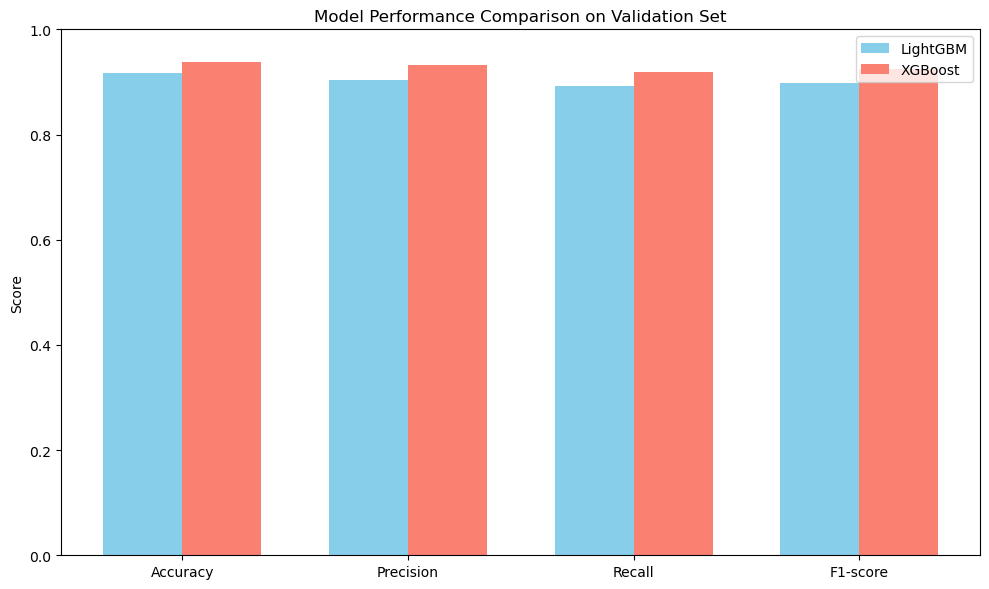

In [27]:
# Visualize the comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lgb_scores = [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1]
xgb_scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lgb_scores, width, label='LightGBM', color='skyblue')
rects2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison on Validation Set')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.ylim(0, 1.0)
fig.tight_layout()
plt.show()

## Summary

## The comparative analysis of two popular gradient boosting algorithms, LightGBM and XGBoost, on the Titanic survival prediction task. The objective was to build and evaluate predictive models to determine which algorithm performs better on this dataset.


## After data preprocessing, which included handling missing values and one-hot encoding categorical features, both LightGBM and XGBoost models were trained and tuned using GridSearchCV. The performance of the best-tuned models was then evaluated on a validation set. 